<a href="https://colab.research.google.com/github/zneto0/Guindaste/blob/main/Projeto_de_guindaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIMENSIONAMENTO DE GUINDASTE DE LANÇA TELESCÓPIA

Grupo 1:

Larissa Pimentel

Laryane Nascimento

Osvaldo Navarro

Vinicius

Zezito Soares

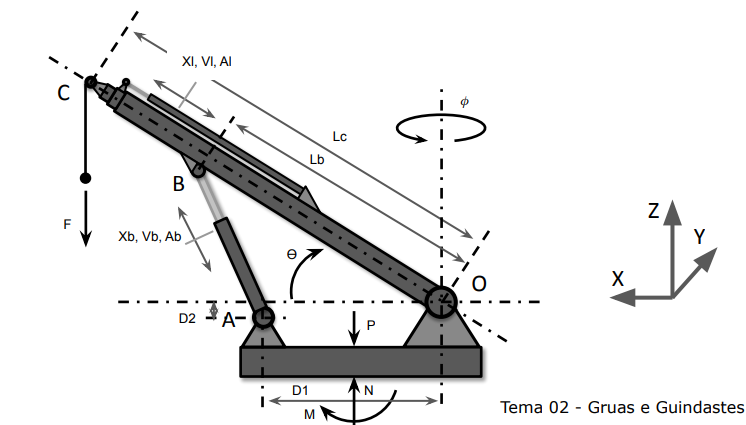



In [ ]:
import sympy as sp
from sympy import symbols, atan, acos, sqrt, sin, cos, simplify, Eq
from IPython.display import display, Math
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [ ]:

# Ativar visualização em LaTeX
sp.init_printing(use_latex='mathjax')

# Definir variáveis simbólicas
D1, D2, Lb, Xb, Xl, Phi, x_giro = sp.symbols('D1 D2 L_b X_b X_l phi x_giro', real=True, positive=True)

# 2. Calculando Alpha (em radianos)
AO = sp.sqrt(D1**2 + D2**2)
alpha = atan(D2 / D1)

# 3. Calculando Beta com a nova forma da lei dos cossenos
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = acos(cos_beta)

# 4. Theta simbólico
theta = beta - alpha

# 5. Expressões de Cx' e Cz
Cx_linha = Xl * cos(theta)
Cz = Xl * sin(theta)

# 6. Mostrar equações simplificadas
display(Eq(sp.Symbol("theta"), simplify(theta)))
print("                                               ")
display(Eq(sp.Symbol("C_x'"), simplify(Cx_linha)))
print("                                               ")
display(Eq(sp.Symbol("C_z"), simplify(Cz)))


        ⎛  2     2      2      2⎞           
        ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞
θ = acos⎜───────────────────────⎟ - atan⎜──⎟
        ⎜          ___________  ⎟       ⎝D₁⎠
        ⎜         ╱   2     2   ⎟           
        ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           

             ⎛    ⎛  2     2      2      2⎞           ⎞
             ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C_x' = Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
             ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
             ⎜    ⎜         ╱   2     2   ⎟           ⎟
             ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

            ⎛    ⎛  2     2      2      2⎞           ⎞
            ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C_z = Xₗ⋅sin⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
            ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
            ⎜    ⎜         ╱   2     2   ⎟           ⎟
            ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

In [ ]:
#OBS: A VARIAÇÃO EM PHI NÃO OCORRE NO PONTO O, HÁ UMA DEFASAGEM EM RELAÇÃO A X_giro (ditância do centro de giro ao ponto O)



# 5. Posições com rotação Phi
Cx = (Cx_linha - x_giro) * cos(Phi)
Cy = (Cx_linha - x_giro) * sin(Phi)

# 6. Mostrar expressões finais
display(sp.Eq(sp.Symbol("C_x"), sp.simplify(Cx)))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y"), sp.simplify(Cy)))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z"), sp.simplify(Cz)))


     ⎛      ⎛    ⎛  2     2      2      2⎞           ⎞         ⎞       
     ⎜      ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟         ⎟       
Cₓ = ⎜Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟ - x_giro⎟⋅cos(φ)
     ⎜      ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟         ⎟       
     ⎜      ⎜    ⎜         ╱   2     2   ⎟           ⎟         ⎟       
     ⎝      ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠         ⎠       

      ⎛      ⎛    ⎛  2     2      2      2⎞           ⎞         ⎞       
      ⎜      ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟         ⎟       
C_y = ⎜Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟ - x_giro⎟⋅sin(φ)
      ⎜      ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟         ⎟       
      ⎜      ⎜    ⎜         ╱   2     2   ⎟           ⎟         ⎟       
      ⎝      ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠         ⎠       

            ⎛    ⎛  2     2      2      2⎞           ⎞
            ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C_z = Xₗ⋅sin⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
            ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
            ⎜    ⎜         ╱   2     2   ⎟           ⎟
            ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

In [ ]:


# Ativar visualização em LaTeX
sp.init_printing(use_latex='mathjax')

# Tempo
t = sp.Symbol('t')

# Constantes
D1, D2, Lb = sp.symbols('D1 D2 L_b', real=True, positive=True)

# Funções do tempo
Xb = sp.Function('X_b')(t)
Xl = sp.Function('X_l')(t)
Phi = sp.Function('Phi')(t)

# Ponto de rotação (giro não é em O)
Xp = sp.symbols('X_p', real=True)

# AO e alpha
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)

# Ângulo theta
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# Projeções
Cx_linha = Xl * sp.cos(theta)
Cz = Xl * sp.sin(theta)

# Rotação em torno de (Xp)
Cx = Xp + (Cx_linha - Xp) * sp.cos(Phi)
Cy = (Cx_linha - Xp) * sp.sin(Phi)

# Velocidades (sem simplify)
Cx_dot = sp.diff(Cx, t)
Cy_dot = sp.diff(Cy, t)
Cz_dot = sp.diff(Cz, t)

# Acelerações (sem simplify)
Cx_ddot = sp.diff(Cx_dot, t)
Cy_ddot = sp.diff(Cy_dot, t)
Cz_ddot = sp.diff(Cz_dot, t)

# Exibir resultados
print("=== POSIÇÕES ===")
print("                                               ")
display(sp.Eq(sp.Symbol('C_x(t)'), Cx))
print("                                               ")
display(sp.Eq(sp.Symbol('C_y(t)'), Cy))
print("                                               ")
display(sp.Eq(sp.Symbol('C_z(t)'), Cz))
print("                                               ")

print("=== VELOCIDADES ===")
print("                                               ")
display(sp.Eq(sp.Symbol("C_x_dot(t)"), Cx_dot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y_dot(t)"), Cy_dot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z_dot(t)"), Cz_dot))
print("                                               ")

print("=== ACELERAÇÕES ===")
print("                                               ")
display(sp.Eq(sp.Symbol("C_x_ddot(t)"), Cx_ddot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y_ddot(t)"), Cy_ddot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z_ddot(t)"), Cz_ddot))
print("                                               ")


=== POSIÇÕES ===
                                               


             ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞    ↪
             ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟    ↪
Cₓ₍ₜ₎ = Xₚ + ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅co ↪
             ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟    ↪
             ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟    ↪
             ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠    ↪

↪        
↪        
↪ s(Φ(t))
↪        
↪        
↪        

         ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞        ↪
         ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟        ↪
C_y(t) = ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅sin(Φ( ↪
         ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟        ↪
         ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟        ↪
         ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠        ↪

↪    
↪    
↪ t))
↪    
↪    
↪    

                  ⎛    ⎛  2     2      2      2   ⎞           ⎞
                  ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟
C_z(t) = Xₗ(t)⋅sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟
                  ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟
                  ⎜    ⎜           ╱   2     2    ⎟           ⎟
                  ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠

                                               
=== VELOCIDADES ===
                                               


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
               ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞  ↪
               ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟  ↪
C_x_dot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅ ↪
               ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟  ↪
               ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟  ↪
               ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠  ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
             ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞    ↪
             ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟    ↪
C_y_dot(t) = ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅co ↪
             ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟    ↪
             ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟    ↪
             ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠    ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                          X_b( ↪
                                                                               ↪
                ⎛    ⎛  2     2      2      2   ⎞           ⎞                  ↪
                ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟ d                ↪
C_z_dot(t) = sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⋅──(Xₗ(t)) + ──── ↪
                ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟ dt               ↪
                ⎜    ⎜           ╱   2     2    ⎟           ⎟                  ↪
                ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠                  ↪
                                                                               ↪
                                                                               ↪
                            

                                               
=== ACELERAÇÕES ===
                                               


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞ ↪
                ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟ ↪
C_x_ddot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟ ↪
                ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟ ↪
                ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟ ↪
                ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠ ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞ ↪
                ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟ ↪
C_y_ddot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟ ↪
                ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟ ↪
                ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟ ↪
                ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠ ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                            X_ ↪
                                                                               ↪
                 ⎛    ⎛  2     2      2      2   ⎞           ⎞  2              ↪
                 ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟ d               ↪
C_z_ddot(t) = sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⋅───(Xₗ(t)) + ── ↪
                 ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟   2             ↪
                 ⎜    ⎜           ╱   2     2    ⎟           ⎟ dt              ↪
                 ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠                 ↪
                                                                               ↪
                                                                               ↪
                            

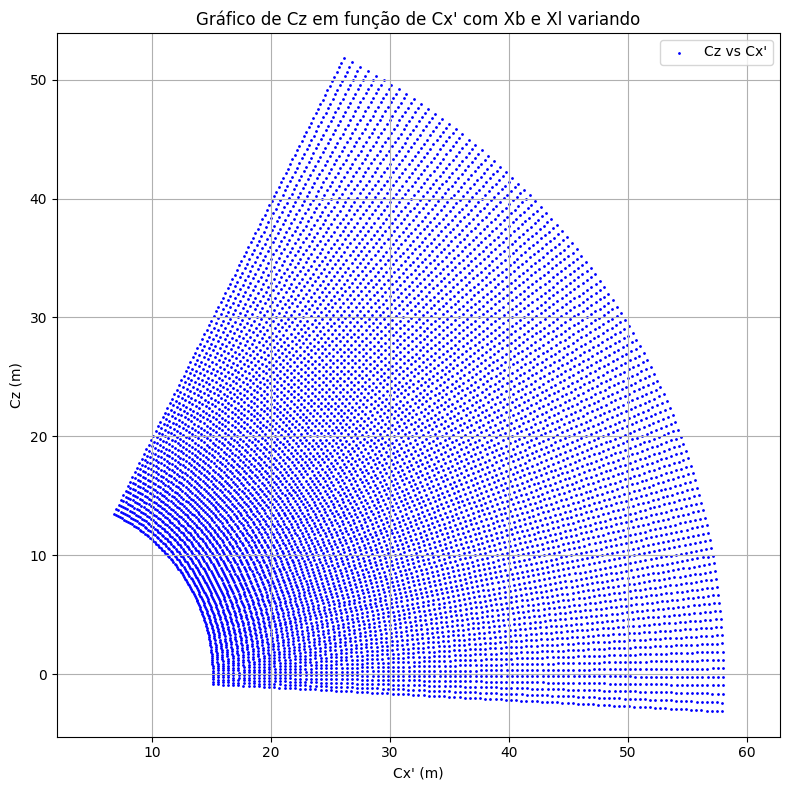

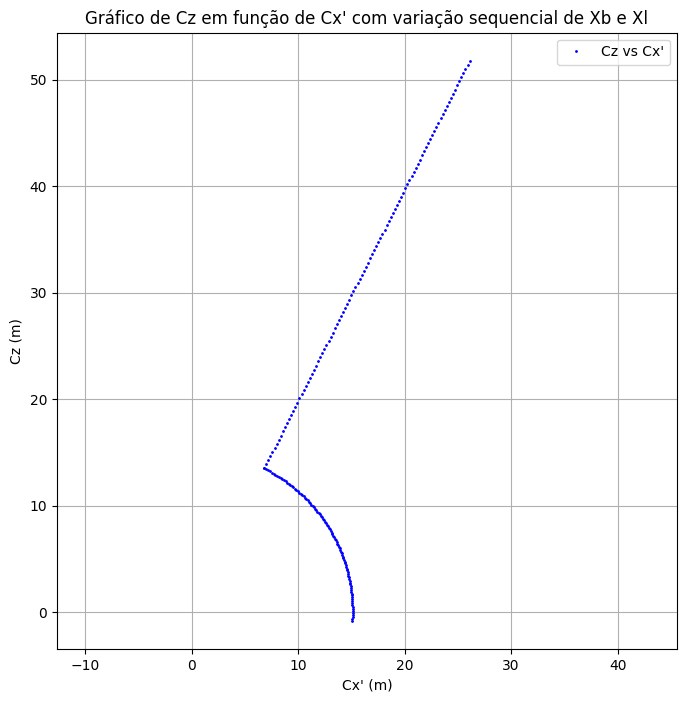

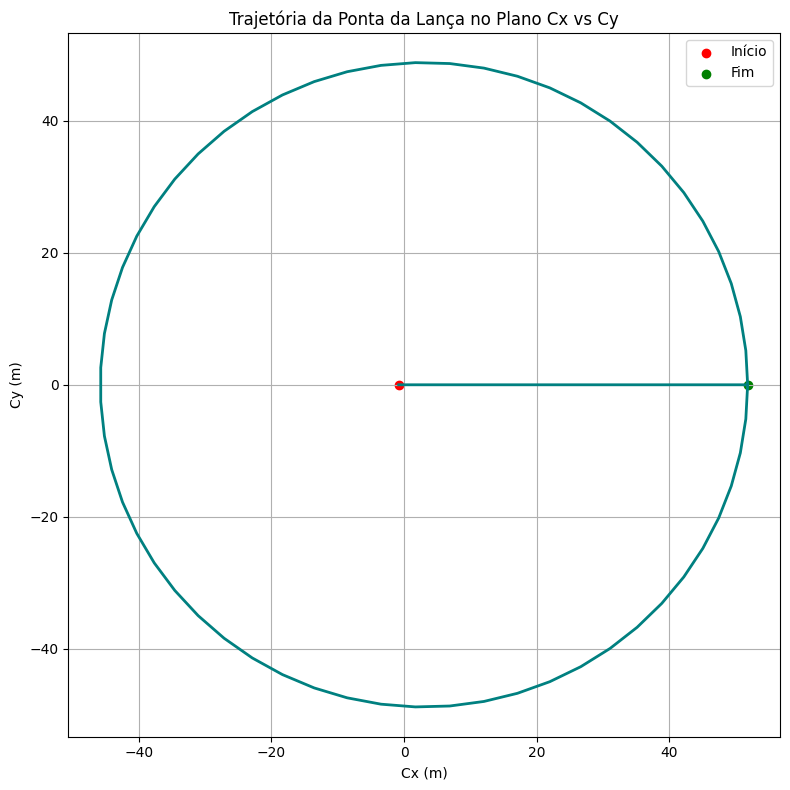

In [ ]:
#OBS: X_giro aqui é Xc
# Dados fixos
D1 = 2.5
D2 = 2
Lb = 6.7
Xc, Yc = 3.0, 0.0      # Centro de rotação (onde ocorre a rotação Phi)

# Intervalos
Xb_vals = np.linspace(4.5, 8, 100)   # valores de Xb (varia mais devagar)
Xl_vals = np.linspace(15.107, 58, 100)  # valores de Xl (varia mais rápido)
phi_vals = np.radians(np.linspace(0,360 , 60))  # Convertendo para radianos

# Constantes geométricas
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# Preparar listas
Cx_linha = []
Cz = []

# Loop em estilo "leque"
for Xb in Xb_vals:
    for Xl in Xl_vals:
        cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
        cos_beta = np.clip(cos_beta, -1.0, 1.0)  # evita domínio inválido
        beta = np.arccos(cos_beta)
        theta = beta - alpha

        Cx_linha.append(Xl * np.cos(theta))
        Cz.append(Xl * np.sin(theta))



# Plot
plt.figure(figsize=(8, 8))
plt.scatter(Cx_linha, Cz, s=1, color='blue', label="Cz vs Cx'")
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Gráfico de Cz em função de Cx' com Xb e Xl variando")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
print (" ")

# Armazenar coordenadas
Cx_prime_vals = []
Cz_vals = []

# Etapa 1: Xb varia, Xl fixo no início
Xl_const = Xl_vals[0]
for Xb in Xb_vals:
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha
    Lc = Xl_const
    Cx_prime = Lc * np.cos(theta)
    Cz = Lc * np.sin(theta)
    Cx_prime_vals.append(Cx_prime)
    Cz_vals.append(Cz)

# Etapa 2: Xl varia, Xb fixo no valor final
Xb_const = Xb_vals[-1]
for Xl in Xl_vals:
    cos_beta = (AO**2 + Lb**2 - Xb_const**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha
    Lc = Xl
    Cx_prime = Lc * np.cos(theta)
    Cz = Lc * np.sin(theta)
    Cx_prime_vals.append(Cx_prime)
    Cz_vals.append(Cz)



# Plot

plt.figure(figsize=(8, 8))
plt.plot(Cx_prime_vals, Cz_vals, 'b.', markersize=2, label="Cz vs Cx'")
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Gráfico de Cz em função de Cx' com variação sequencial de Xb e Xl")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

print (" ")
# === Valores fixos finais para fase de variação de phi ===
Xb_fixed = Xb_vals[-1]
Xl_fixed = Xl_vals[-1]

# === Pré-calcular constantes ===
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# === Função para calcular theta ===
def calc_theta(Xb):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1, 1)  # Evita domínio inválido
    beta = np.arccos(cos_beta)
    return beta - alpha

# === Armazenar coordenadas Cx e Cy ===
Cx_all = []
Cy_all = []

# === Etapa 1: variação de Xb (Xl e phi fixos) ===
for Xb in Xb_vals:
    theta = calc_theta(Xb)
    Cx_linha = Xl_vals[0] * np.sin(theta)
    Cx = Xc + (Cx_linha - Xc) * np.cos(phi_vals[0])
    Cy = Yc + (Cx_linha - Xc) * np.sin(phi_vals[0])
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Etapa 2: variação de Xl (Xb fixo, phi fixo) ===
theta = calc_theta(Xb_fixed)
for Xl in Xl_vals:
    Cx_linha = Xl * np.sin(theta)
    Cx = Xc + (Cx_linha - Xc) * np.cos(phi_vals[0])
    Cy = Yc + (Cx_linha - Xc) * np.sin(phi_vals[0])
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Etapa 3: variação de phi (Xb e Xl fixos) ===
theta = calc_theta(Xb_fixed)
Cx_linha = Xl_fixed * np.sin(theta)
for phi in phi_vals:
    Cx = Xc + (Cx_linha - Xc) * np.cos(phi)
    Cy = Yc + (Cx_linha - Xc) * np.sin(phi)
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Converter listas em arrays ===
Cx_all = np.array(Cx_all)
Cy_all = np.array(Cy_all)

# === Plotar resultado ===
plt.figure(figsize=(8, 8))
plt.plot(Cx_all, Cy_all, color='teal', lw=2)
plt.scatter(Cx_all[0], Cy_all[0], color='red', label='Início')
plt.scatter(Cx_all[-1], Cy_all[-1], color='green', label='Fim')
plt.title("Trajetória da Ponta da Lança no Plano Cx vs Cy")
plt.xlabel("Cx (m)")
plt.ylabel("Cy (m)")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()



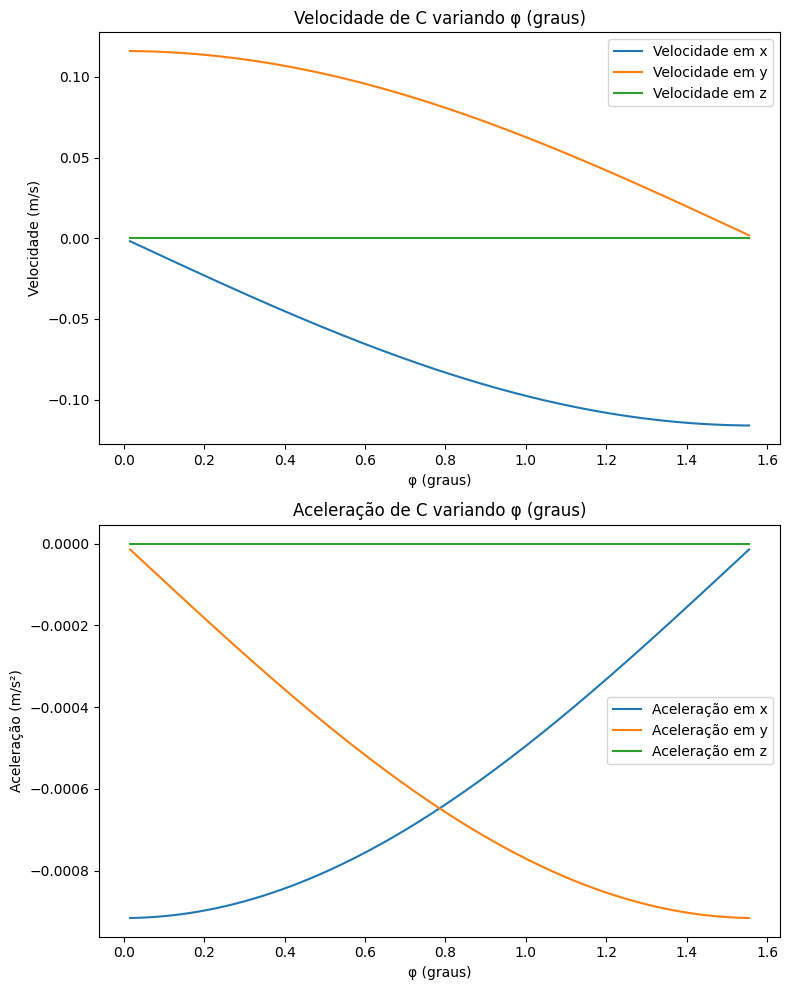

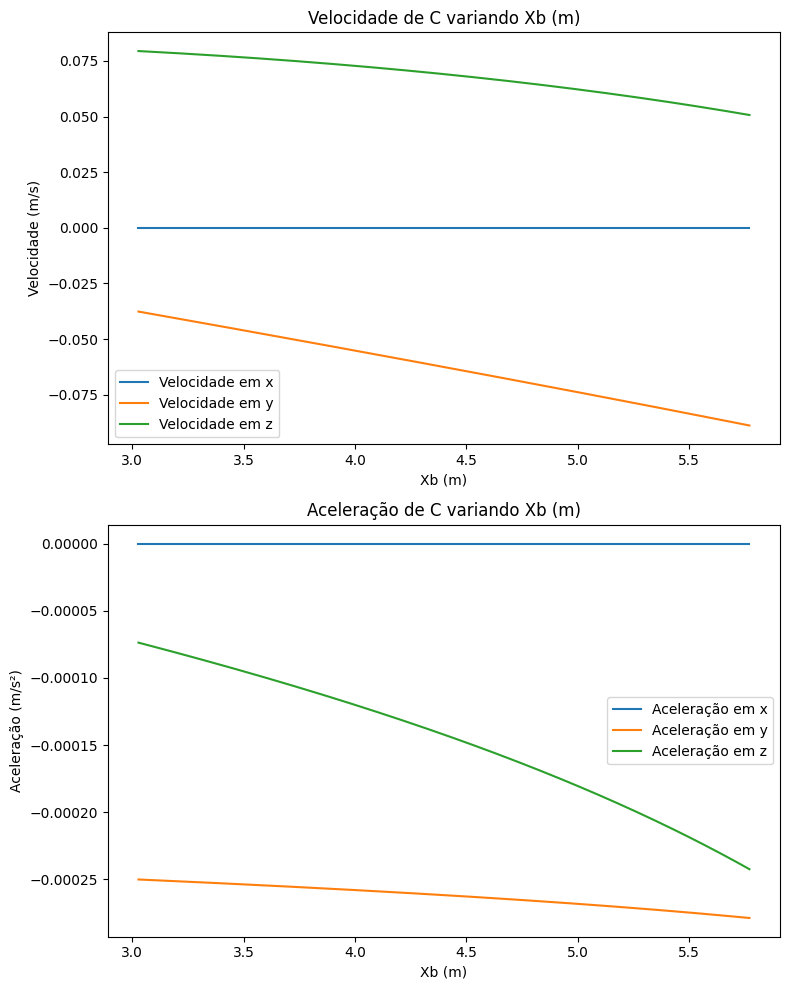

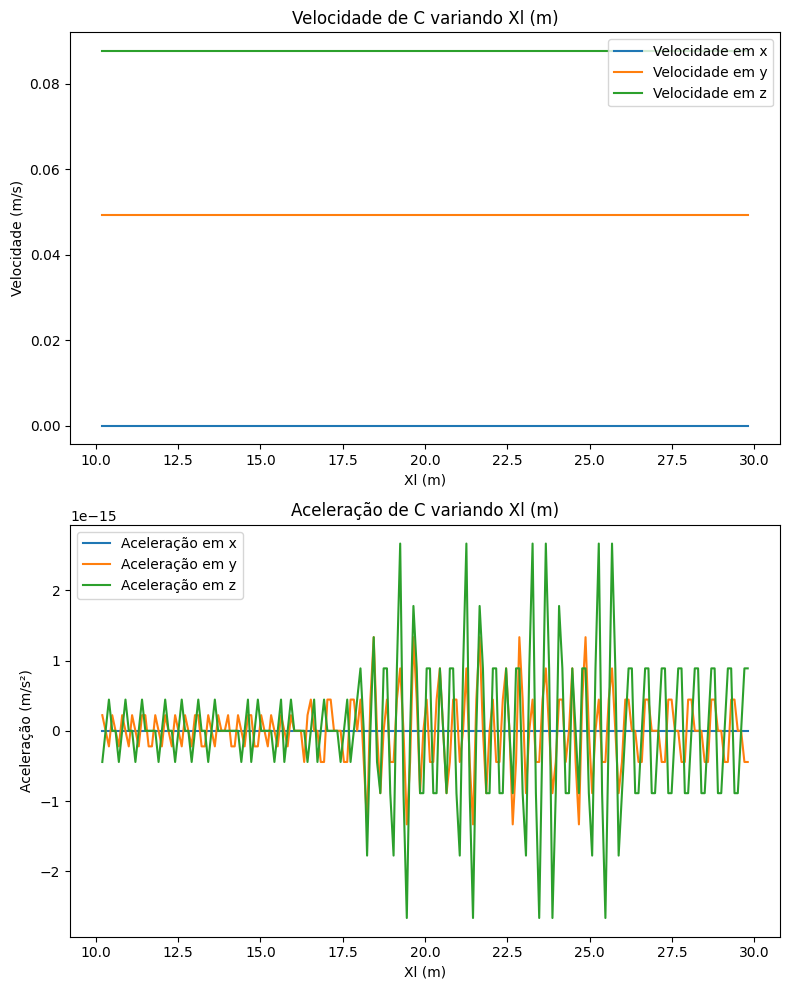

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores constantes
D1 = 5.0
D2 = 0.85
Lb = 5.0
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# Valores finais de Xb e Xl
Xb_final = 5.8
Xl_final = 30.0

# Parâmetros para variação
N = 200
phi_vals = np.radians(np.linspace(0, 90, N))
Xb_vals = np.linspace(3.0, Xb_final, N)
Xl_vals = np.linspace(10.0, Xl_final, N)

def calcula_theta(Xb):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    beta = np.arccos(np.clip(cos_beta, -1, 1))
    return beta - alpha

def calcula_posicoes(Xb, Xl, phi):
    theta = calcula_theta(Xb)
    Cx_linha = Xl * np.cos(theta)
    Cz = Xl * np.sin(theta)
    Cx = Cx_linha * np.cos(phi)
    Cy = Cx_linha * np.sin(phi)
    return Cx, Cy, Cz, Cx_linha

# Para armazenar velocidades e acelerações
velocidades = {"phi": [], "Xb": [], "Xl": []}
aceleracoes = {"phi": [], "Xb": [], "Xl": []}

def calcula_derivadas(variavel, nome):
    Cx_list = []
    Cy_list = []
    Cz_list = []

    for val in variavel:
        if nome == "phi":
            Cx, Cy, Cz, _ = calcula_posicoes(Xb_final, Xl_final, val)
        elif nome == "Xb":
            Cx, Cy, Cz, _ = calcula_posicoes(val, Xl_final, np.radians(90))
        elif nome == "Xl":
            Cx, Cy, Cz, _ = calcula_posicoes(Xb_final, val, np.radians(90))
        Cx_list.append(Cx)
        Cy_list.append(Cy)
        Cz_list.append(Cz)

    # Derivadas aproximadas
    dt = 1  # intervalo fictício
    v_Cx = np.gradient(Cx_list, dt)
    v_Cy = np.gradient(Cy_list, dt)
    v_Cz = np.gradient(Cz_list, dt)

    a_Cx = np.gradient(v_Cx, dt)
    a_Cy = np.gradient(v_Cy, dt)
    a_Cz = np.gradient(v_Cz, dt)

    velocidades[nome] = (v_Cx, v_Cy, v_Cz)
    aceleracoes[nome] = (a_Cx, a_Cy, a_Cz)

    return variavel, v_Cx, v_Cy, v_Cz, a_Cx, a_Cy, a_Cz

def plota_resultados(variavel, nome, label):
    x_vals, vx, vy, vz, ax, ay, az = calcula_derivadas(variavel, nome)

    # Restringindo índices de 2 a N-2
    start_idx = 2
    end_idx = N - 2

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    axs[0].plot(x_vals[start_idx:end_idx], vx[start_idx:end_idx], label='Velocidade em x')
    axs[0].plot(x_vals[start_idx:end_idx], vy[start_idx:end_idx], label='Velocidade em y')
    axs[0].plot(x_vals[start_idx:end_idx], vz[start_idx:end_idx], label='Velocidade em z')
    axs[0].set_title(f'Velocidade de C variando {label}')
    axs[0].set_xlabel(label)
    axs[0].set_ylabel('Velocidade (m/s)')
    axs[0].legend()

    axs[1].plot(x_vals[start_idx:end_idx], ax[start_idx:end_idx], label='Aceleração em x')
    axs[1].plot(x_vals[start_idx:end_idx], ay[start_idx:end_idx], label='Aceleração em y')
    axs[1].plot(x_vals[start_idx:end_idx], az[start_idx:end_idx], label='Aceleração em z')
    axs[1].set_title(f'Aceleração de C variando {label}')
    axs[1].set_xlabel(label)
    axs[1].set_ylabel('Aceleração (m/s²)')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Gerar gráficos
plota_resultados(phi_vals, "phi", "φ (graus)")
plota_resultados(Xb_vals, "Xb", "Xb (m)")
plota_resultados(Xl_vals, "Xl", "Xl (m)")

**PARTE 2- ENCONTRAR O CG E INERCIA DA LANÇA**

In [ ]:


# Inicialização simbólica
sp.init_printing(use_latex='mathjax')

# Variáveis geométricas e angulares
D1, D2, Lb, Xb, Xl, rho = sp.symbols('D1 D2 Lb Xb Xl rho', real=True, positive=True)
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# Número de seções
N = 4  # exemplo com 4 seções

# Listas
Xl = []
h = []
r = []
e = []
V = []
m = []
d = []

for i in range(N):
    # Símbolos de geometria da seção i
    Xl_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    Xl.append(Xl_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    # Volume da seção i
    V_i = 2 * h_i * e_i * Xl_i + (sp.pi * r_i**2 / 2) * Xl_i + 2*e_i*r_i*Xl_i
    V.append(V_i)

    # Massa da seção i
    m_i = rho * V_i
    m.append(m_i)

    # Distância do CG da seção i até a base da lança
    if i == 0:
        d_i = Xl_i / 2
    else:
        d_i = Xl[0] + sum(Xl[j] for j in range(1, i)) + Xl_i / 2
    d.append(d_i)

# Coordenadas do CG de cada seção
Cx_i = [d[i] * sp.cos(theta) for i in range(N)]
Cz_i = [d[i] * sp.sin(theta) for i in range(N)]

# CG total (média ponderada)
M_total = sum(m)
Cx_cg = sum(m[i] * Cx_i[i] for i in range(N)) / M_total
Cz_cg = sum(m[i] * Cz_i[i] for i in range(N)) / M_total

# Resultados
display(sp.Eq(sp.Symbol("C_{x,CG}'"), sp.simplify(Cx_cg)))
display(sp.Eq(sp.Symbol("C_{z,CG}"), sp.simplify(Cz_cg)))


                                                                               ↪
                                                                               ↪
            ⎛   2 ⎛                        2⎞                     ⎛            ↪
            ⎝Xl₁ ⋅⎝4⋅e₁⋅h₁ + 4⋅e₁⋅r₁ + π⋅r₁ ⎠ + Xl₂⋅(2⋅Xl₁ + Xl₂)⋅⎝4⋅e₂⋅h₂ + 4 ↪
                                                                               ↪
C_{x,CG}' = ────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪              2⎞                             ⎛                        2⎞      ↪
↪ ⋅e₂⋅r₂ + π⋅r₂ ⎠ + Xl₃⋅(2⋅Xl₁ + 2⋅Xl₂ + Xl₃)⋅⎝4⋅e₃⋅h₃ + 4⋅e₃⋅r₃ + π⋅r₃ ⎠ + Xl ↪
↪                          

                                                                               ↪
                                                                               ↪
           ⎛   2 ⎛                        2⎞                     ⎛             ↪
           ⎝Xl₁ ⋅⎝4⋅e₁⋅h₁ + 4⋅e₁⋅r₁ + π⋅r₁ ⎠ + Xl₂⋅(2⋅Xl₁ + Xl₂)⋅⎝4⋅e₂⋅h₂ + 4⋅ ↪
                                                                               ↪
C_{z,CG} = ─────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪             2⎞                             ⎛                        2⎞       ↪
↪ e₂⋅r₂ + π⋅r₂ ⎠ + Xl₃⋅(2⋅Xl₁ + 2⋅Xl₂ + Xl₃)⋅⎝4⋅e₃⋅h₃ + 4⋅e₃⋅r₃ + π⋅r₃ ⎠ + Xl₄ ↪
↪                          

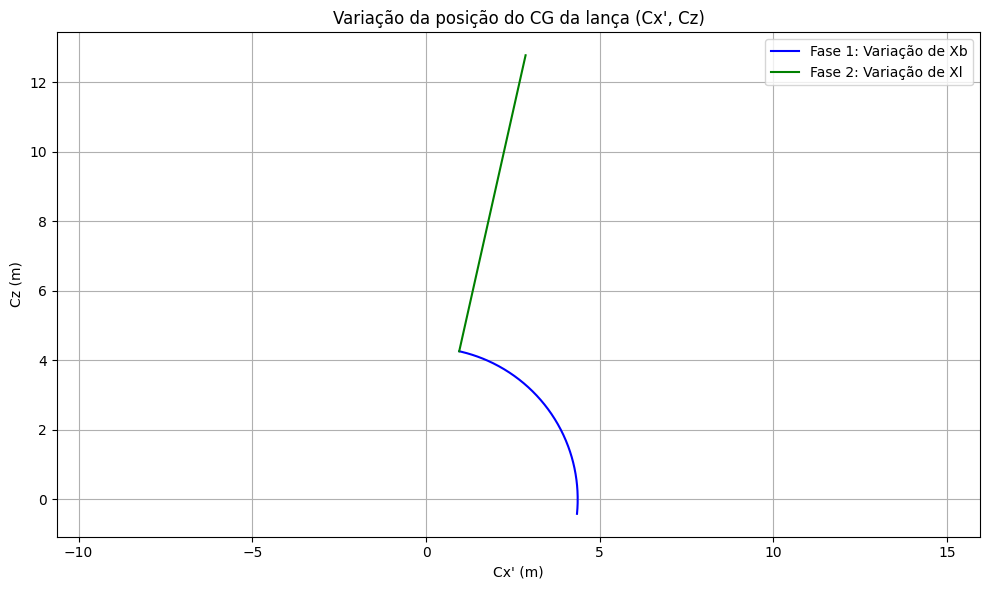

In [ ]:

# Parâmetros fixos
D1 = 2
D2 = 0.85
Lb = 5
rho = 7800

# Xb variando , Xl constante
Xb_inicio = 3
Xb_fim = 5.8
Xb_vals = np.linspace(Xb_inicio, Xb_fim, 200)

Xl_const = 10  # valor inicial de Xl (primeira seção)

# Fase 2: Xl variando, Xb constante
Xl_vals = np.linspace(10, sum([10, 10, 10]), 200)
Xb_const = Xb_final  # <<< Também ajustado para manter coerência visual

# Geometria e massas das lanças
N = 3
L = [10, 10, 10]
h = [0.65, 0.59, 0.59 * 0.95]
r = [0.35, 0.29, 0.29 * 0.95]
e = [0.05, 0.03, 0.03]

# Pré-cálculo de volume e massa
m = []
for i in range(N):
    V_i = 2 * h[i] * e[i] * L[i] + (np.pi * r[i]**2 / 2) * L[i] + 2*e[i]*r[i]*L[i]
    m.append(rho * V_i)

AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

def calcula_CG(Xb, Xl_total):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha


    # cálculo de d_i de acordo com o Xl_total e proporção de cada lança
    d = []
    L_acumulado = 0
    for i in range(N):
        prop = L[i] / sum(L)
        Li = prop * Xl_total
        d_i = L_acumulado + Li / 2
        d.append(d_i)
        L_acumulado += Li

    # CG ponderado
    M_total = sum(m)
    Cx = sum(m[i] * d[i] * np.cos(theta) for i in range(N)) / M_total
    Cz = sum(m[i] * d[i] * np.sin(theta) for i in range(N)) / M_total

    return Cx, Cz

# Fase 1 - Variação de Xb
Cx_cg_fase1, Cz_cg_fase1 = [], []
for xb in Xb_vals:
    cx, cz = calcula_CG(xb, Xl_const)
    Cx_cg_fase1.append(cx)
    Cz_cg_fase1.append(cz)

# Fase 2 - Variação de Xl
Cx_cg_fase2, Cz_cg_fase2 = [], []
for xl in Xl_vals:
    cx, cz = calcula_CG(Xb_const, xl)
    Cx_cg_fase2.append(cx)
    Cz_cg_fase2.append(cz)



# Plot
plt.figure(figsize=(10, 6))
plt.plot(Cx_cg_fase1, Cz_cg_fase1, 'b-', label='Fase 1: Variação de Xb')
plt.plot(Cx_cg_fase2, Cz_cg_fase2, 'g-', label='Fase 2: Variação de Xl')
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Variação da posição do CG da lança (Cx', Cz)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()


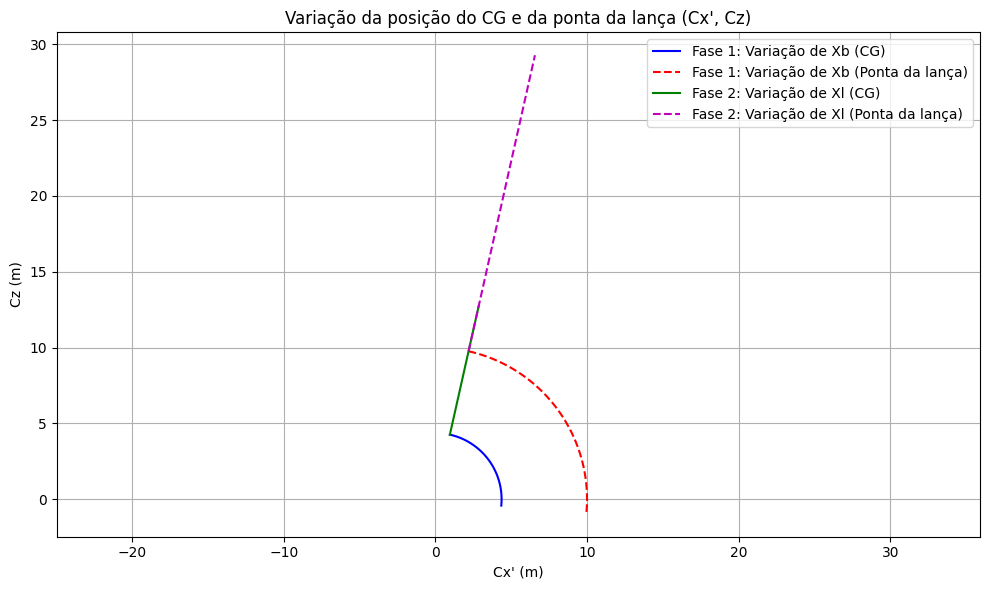

In [ ]:


# Parâmetros fixos
D1 = 2
D2 = 0.85
Lb = 5
rho = 7800

# Xb variando , Xl constante
Xb_inicio = 3
Xb_fim = 5.8
Xb_vals = np.linspace(Xb_fim, Xb_inicio, 50)  # Ordem ajustada
Xl_const = 10  # valor inicial de Xl (primeira seção)

# Fase 2: Xl variando, Xb constante
Xl_vals = np.linspace(10, sum([10, 10, 10]), 50)
Xb_const = Xb_final  # Coerente com a Fase 1

# Geometria e massas das lanças
N = 3
comprimentos_lancas = [10, 10, 10]
h = [0.65, 0.59, 0.59 * 0.95]
r = [0.35, 0.29, 0.29 * 0.95]
e = [0.05, 0.03, 0.03]

# Pré-cálculo de volume e massa
m = []
for i in range(N):
    V_i = 2 * h[i] * e[i] * comprimentos_lancas[i] + (np.pi * r[i]**2 / 2) * comprimentos_lancas[i] + 2*e[i]*r[i]*comprimentos_lancas[i]
    m.append(rho * V_i)

AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

def calcula_CG(Xb, Xl_total):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha

    # cálculo de d_i de acordo com o Xl_total e proporção de cada lança
    d = []
    L_acumulado = 0
    for i in range(N):
        prop = comprimentos_lancas[i] / sum(comprimentos_lancas)
        Li = prop * Xl_total
        d_i = L_acumulado + Li / 2
        d.append(d_i)
        L_acumulado += Li

    # CG ponderado
    M_total = sum(m)
    Cx = sum(m[i] * d[i] * np.cos(theta) for i in range(N)) / M_total
    Cz = sum(m[i] * d[i] * np.sin(theta) for i in range(N)) / M_total

    return Cx, Cz, theta  # Retorna também o ângulo theta para a ponta da lança

def calcula_ponta_da_lanca(Xb, Xl_total, theta):
    # Calcula a posição da ponta da lança (Cx', Cz)
    Cx_ponta = Xl_total * np.cos(theta)
    Cz_ponta = Xl_total * np.sin(theta)
    return Cx_ponta, Cz_ponta

# Fase 1 - Variação de Xb
Cx_cg_fase1, Cz_cg_fase1 = [], []
Cx_ponta_fase1, Cz_ponta_fase1 = [], []
for xb in Xb_vals:
    cx, cz, theta = calcula_CG(xb, Xl_const)
    cx_ponta, cz_ponta = calcula_ponta_da_lanca(xb, Xl_const, theta)
    Cx_cg_fase1.append(cx)
    Cz_cg_fase1.append(cz)
    Cx_ponta_fase1.append(cx_ponta)
    Cz_ponta_fase1.append(cz_ponta)

# Fase 2 - Variação de Xl
Cx_cg_fase2, Cz_cg_fase2 = [], []
Cx_ponta_fase2, Cz_ponta_fase2 = [], []
for xl in Xl_vals:
    cx, cz, theta = calcula_CG(Xb_const, xl)
    cx_ponta, cz_ponta = calcula_ponta_da_lanca(Xb_const, xl, theta)
    Cx_cg_fase2.append(cx)
    Cz_cg_fase2.append(cz)
    Cx_ponta_fase2.append(cx_ponta)
    Cz_ponta_fase2.append(cz_ponta)

# Plot
plt.figure(figsize=(10, 6))
# Posição do CG com Xb variando
plt.plot(Cx_cg_fase1, Cz_cg_fase1, 'b-', label='Fase 1: Variação de Xb (CG)')
# Posição da ponta da lança com Xb variando
plt.plot(Cx_ponta_fase1, Cz_ponta_fase1, 'r--', label='Fase 1: Variação de Xb (Ponta da lança)')
# Posição do CG com Xl variando
plt.plot(Cx_cg_fase2, Cz_cg_fase2, 'g-', label='Fase 2: Variação de Xl (CG)')
# Posição da ponta da lança com Xl variando
plt.plot(Cx_ponta_fase2, Cz_ponta_fase2, 'm--', label='Fase 2: Variação de Xl (Ponta da lança)')
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Variação da posição do CG e da ponta da lança (Cx', Cz)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()


In [ ]:
import sympy as sp

# Inicialização simbólica
sp.init_printing(use_latex='mathjax')

# Parâmetros simbólicos globais
D1, D2, Lb, Xb, Xl, rho = sp.symbols('D1 D2 Lb Xb Xl rho', real=True, positive=True)
AO = sp.sqrt(D1**2 + D2**2)  # Distância da base
alpha = sp.atan(D2 / D1)  # Ângulo de inclinação da base

# Lei dos Cossenos para calcular o ângulo beta
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)

# Ângulo theta
theta = beta - alpha  # Ângulo de inclinação da lança

# Número de seções (exemplo com 4 seções)
N = 4

# Listas de variáveis simbólicas para cada seção
L = []
h = []
r = []
e = []
V = []
m = []
d = []

# Distância do centro de massa ao ponto O em cada direção
d_x = []
d_z = []

# Considerando a seção superior com espessura 'e' e comprimento '2r'
e_sup = sp.Symbol('e_sup', real=True, positive=True)
r_sup = sp.Symbol('r_sup', real=True, positive=True)
L_sup = 2 * r_sup  # Comprimento da seção superior (2r)

# Adicionando a seção superior ao cálculo das variáveis
L.append(L_sup)
h.append(e_sup)  # altura da seção superior
r.append(r_sup)  # raio da seção superior
e.append(e_sup)  # espessura da seção superior

# Volume e massa da seção superior
V_sup = 2 * e_sup * r_sup * L_sup  # Volume da seção superior (retângulo)
V.append(V_sup)
m_sup = rho * V_sup  # Massa da seção superior
m.append(m_sup)

# Distância do centro de massa (CG) da seção superior
d_sup = L_sup / 2
d.append(d_sup)

# Coordenadas do CG da seção superior (considerando a inclinação da lança)
Cx_sup = d_sup * sp.cos(theta)  # Projeção no eixo x
Cz_sup = d_sup * sp.sin(theta)  # Projeção no eixo z

d_x.append(Cx_sup)
d_z.append(Cz_sup)

# Processar as seções móveis (seções telescópicas)
for i in range(1, N):
    # Símbolos de geometria da seção i
    L_i = sp.Symbol(f'L{i+1}', real=True, positive=True)
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    L.append(L_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    # Volume da seção i
    V_i = 2 * h_i * e_i * L_i + (sp.pi * r_i**2 / 2) * L_i + 2*e[i]*r[i]*L[i]
    V.append(V_i)

    # Massa da seção i
    m_i = rho * V_i
    m.append(m_i)

    # Distância do CG da seção i até o ponto de apoio O
    if i == 0:
        d_i = L_i / 2
    else:
        d_i = L[0] + sum(L[j] for j in range(1, i)) + L_i / 2
    d.append(d_i)

    # Coordenadas do CG de cada seção (considerando a inclinação da lança)
    Cx_i = d_i * sp.cos(theta)  # Projeção no eixo x
    Cz_i = d_i * sp.sin(theta)  # Projeção no eixo z

    d_x.append(Cx_i)
    d_z.append(Cz_i)

# Momento de inércia de cada seção em torno dos eixos x e z (usando Teorema de Steiner)
I_x = [m[i] * d_x[i]**2 for i in range(N)]  # Momento de inércia no eixo x
I_z = [m[i] * d_z[i]**2 for i in range(N)]  # Momento de inércia no eixo z

# Momento de inércia total nos eixos x e z
I_total_x = sum(I_x)
I_total_z = sum(I_z)

# Exibir resultados
display(sp.Eq(sp.Symbol("I_{x,total}"), sp.simplify(I_total_x)))
display(sp.Eq(sp.Symbol("I_{z,total}"), sp.simplify(I_total_z)))

# Momento de inércia total para o giro ao redor do ponto O (soma dos momentos)
I_total = I_total_x + I_total_z
display(sp.Eq(sp.Symbol("I_{total}"), sp.simplify(I_total)))


                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛                2 ⎛                        2⎞                 ↪
              ρ⋅⎝L₂⋅(L₂ + 4⋅rₛᵤₚ) ⋅⎝4⋅e₂⋅h₂ + 4⋅e₂⋅r₂ + π⋅r₂ ⎠ + L₃⋅(2⋅L₂ + L₃ ↪
                                                                               ↪
I_{x,total} = ──────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪                          

                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛                2 ⎛                        2⎞                 ↪
              ρ⋅⎝L₂⋅(L₂ + 4⋅rₛᵤₚ) ⋅⎝4⋅e₂⋅h₂ + 4⋅e₂⋅r₂ + π⋅r₂ ⎠ + L₃⋅(2⋅L₂ + L₃ ↪
                                                                               ↪
I_{z,total} = ──────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪                          

              ⎛  3           3             3   2                               ↪
              ⎜L₂ ⋅e₂⋅h₂   L₂ ⋅e₂⋅r₂   π⋅L₂ ⋅r₂        2                2      ↪
I_{total} = ρ⋅⎜───────── + ───────── + ───────── + 2⋅L₂ ⋅L₃⋅e₃⋅h₃ + 2⋅L₂ ⋅L₃⋅e ↪
              ⎝    2           2           8                                   ↪

↪            2      2                                         2      2         ↪
↪        π⋅L₂ ⋅L₃⋅r₃        2                2            π⋅L₂ ⋅L₄⋅r₄        2 ↪
↪ ₃⋅r₃ + ──────────── + 2⋅L₂ ⋅L₄⋅e₄⋅h₄ + 2⋅L₂ ⋅L₄⋅e₄⋅r₄ + ──────────── + 4⋅L₂  ↪
↪             2                                                2               ↪

↪                                                                              ↪
↪                   2                  2   2               2                2  ↪
↪ ⋅e₂⋅h₂⋅rₛᵤₚ + 4⋅L₂ ⋅e₂⋅r₂⋅rₛᵤₚ + π⋅L₂ ⋅r₂ ⋅rₛᵤₚ + 2⋅L₂⋅L₃ ⋅e₃⋅h₃ + 2⋅L₂⋅L₃ ⋅ ↪
↪                                                                              ↪

↪                2   2   

In [ ]:
import sympy as sp

# Inicialização
sp.init_printing(use_latex='mathjax')

# Símbolos principais
D1, D2, Lb, Xb, rho = sp.symbols('D1 D2 Lb Xb rho', real=True, positive=True)

# Definições geométricas e físicas
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# Substituições numéricas
valores = {
    D1: 2.0,
    D2: 0.85,
    Lb: 5.0,
    Xb: 4.0,
    rho: 7800,
}

# Número de seções móveis
N = 1

# Valores das seções móveis
L_vals = [10.0]  # Comprimento da seção móvel
h_vals = [0.65]  # Altura da parte retangular
r_vals = [0.35]  # Raio da semicircunferência
e_vals = [0.05]  # Espessura da parede

# Inicialização de listas
I_x, I_z = [], []

# Cálculo da inclinação da lança
theta_val = theta.subs(valores).evalf()

# Laço pelas seções
for i in range(N):
    # Geometria da seção
    L_i = L_vals[i]
    h_i = h_vals[i]
    r_i = r_vals[i]
    e_i = e_vals[i]

    # Cálculo do volume conforme especificado
    V_paredes_laterais = 2 * h_i * e_i * L_i          # Duas paredes laterais
    V_semicircular = (sp.pi * r_i**2 / 2) * L_i       # Semicircunferência inferior
    V_tampa_superior = 2 * e_i * r_i * L_i            # Parte superior retangular

    V_i = V_paredes_laterais + V_semicircular + V_tampa_superior

    # Massa
    m_i = valores[rho] * V_i

    # Distância ao ponto de apoio O
    d_i = L_i / 2  # Centro de massa da seção

    # Projeções do centro de massa
    Cx_i = d_i * sp.cos(theta_val)
    Cz_i = d_i * sp.sin(theta_val)

    # Inércias parciais
    I_xi = m_i * Cz_i**2
    I_zi = m_i * Cx_i**2

    I_x.append(I_xi)
    I_z.append(I_zi)

# Soma total
I_total_x = sum(I_x)
I_total_z = sum(I_z)
I_total = I_total_x + I_total_z

# Exibir resultados formatados
from sympy import Eq

# Mostrar resultados simbólicos
display(Eq(sp.Symbol('I_{total,x}'), I_total_x))
display(Eq(sp.Symbol('I_{total,z}'), I_total_z))
display(Eq(sp.Symbol('I_{total}'), I_total))

# Resultados numéricos
I_total_x_val = I_total_x.evalf()
I_total_z_val = I_total_z.evalf()
I_total_val = I_total.evalf()

# Exibição dos valores numéricos
print(f"\nValores numéricos:")
print(f"Momento de inércia total em x: {float(I_total_x_val):.2f} kg·m²")
print(f"Momento de inércia total em z: {float(I_total_z_val):.2f} kg·m²")
print(f"Momento de inércia total: {float(I_total_val):.2f} kg·m²")

I_{total,x} = 42461.8798489769 + 26007.9014074984⋅π

I_{total,z} = 152538.120151023 + 93429.5985925016⋅π

I_{total} = 195000.0 + 119437.5⋅π


Valores numéricos:
Momento de inércia total em x: 124168.11 kg·m²
Momento de inércia total em z: 446055.86 kg·m²
Momento de inércia total: 570223.97 kg·m²


DESCREVER A DINÂMICA DO MECÂNISMO

Diagrama de corpo livre dos componentes

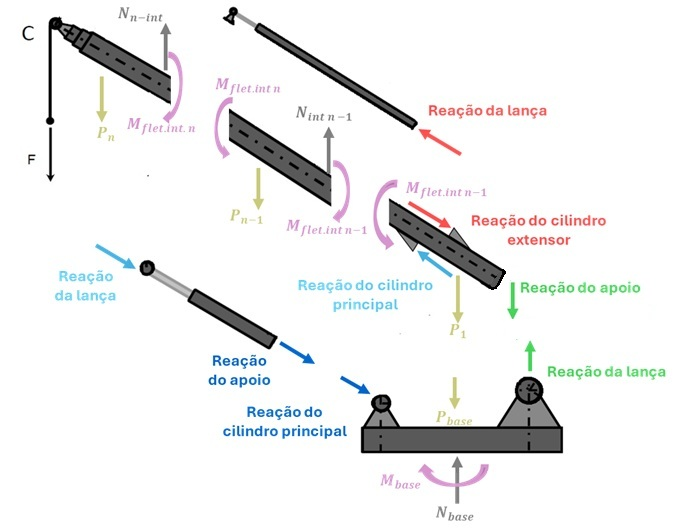

In [ ]:

# Inicialização simbólica
sp.init_printing(use_latex='mathjax')

# Definindo variáveis para Mmax- momento maximo, Xgiro -(diatancia do ponto O para o centro de giro)
Mmax, Xgiro = sp.symbols('Mmax Xgiro', real=True)

# Peso P é dado pela massa total da lança multiplicada pela aceleração gravitacional (g)
g = sp.symbols('g', real=True)  # Aceleração gravitacional

# Definir geometria e massa para cada seção
for i in range(N):
    Xl_list.append(Xl_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    V_i = 2 * h_i * e_i * Xl_i + (sp.pi * r_i**2 / 2) * Xl_i + 2 * e_i * r_i * Xl_i
    V.append(V_i)

    m_i = rho * V_i
    m.append(m_i)

    if i == 0:
        d_i = Xl_i / 2
    else:
        d_i = Xl_list[0] + sum(Xl_list[j] for j in range(1, i)) + Xl_i / 2
    d.append(d_i)

M_total = sum(m)
P = M_total * g

# Fórmula da força máxima
Fmax = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

# Exibindo a equação da força máxima em LaTeX
display(sp.Eq(sp.Symbol("F_{max}"), (Fmax)))


                   ⎛               ⎛                                    2⎞     ↪
                   ⎜               ⎜                            π⋅Xl₁⋅r₁ ⎟     ↪
                   ⎜         Xl₁⋅ρ⋅⎜2⋅Xl₁⋅e₁⋅h₁ + 2⋅Xl₁⋅e₁⋅r₁ + ─────────⎟⋅cos ↪
                   ⎜               ⎝                                2    ⎠     ↪
                   ⎜                                                           ↪
                   ⎜                                                           ↪
                   ⎜         ───────────────────────────────────────────────── ↪
                   ⎜                                                     2     ↪
                   ⎜                                                           ↪
                   ⎜                                                           ↪
          Mmax - g⋅⎜-Xgiro + ───────────────────────────────────────────────── ↪
                   ⎜                                                           ↪
                   ⎜        

In [ ]:
#CÓDIGO SEM COEFICIENTE DE SEGURANÇA

# --- 1. Definir variáveis simbólicas
Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('X_b D1 D2 Lb M_max Xgiro rho g')
N = 4  # Número de lanças

# Listas para armazenar variáveis simbólicas de cada seção
Xl_list, h, r, e, V, m, d = [], [], [], [], [], [], []

# --- 2. Definir geometria e massa para cada seção
for i in range(N):
    Xl_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    Xl_list.append(Xl_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    V_i = 2 * h_i * e_i * Xl_i + (sp.pi * r_i**2 / 2) * Xl_i + 2 * e_i * r_i * Xl_i
    V.append(V_i)

    m_i = rho * V_i
    m.append(m_i)

    if i == 0:
        d_i = Xl_i / 2
    else:
        d_i = Xl_list[0] + sum(Xl_list[j] for j in range(1, i)) + Xl_i / 2
    d.append(d_i)

# --- 3. Ângulo theta
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# --- 4. CG total
Cx_i = [d[i] * sp.cos(theta) for i in range(N)]
Cz_i = [d[i] * sp.sin(theta) for i in range(N)]
M_total = sum(m)
Cx_cg = sum(m[i] * Cx_i[i] for i in range(N)) / M_total
Cz_cg = sum(m[i] * Cz_i[i] for i in range(N)) / M_total

# --- 5. Cx' da ponta da lança
Xl_total = sum(Xl_list)
Cx_linha = Xl_total * sp.cos(theta)

# --- 6. Força máxima
P = M_total * g
F_max = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

# --- 7. Constantes
constantes = {
  D1: 3.7,
    D2: 2,
    Lb: 7.5,
    Mmax: 142000,
    Xgiro: 3.7,
    rho: 7800,
    g: 9.81
}

# --- 8. Parâmetros geométricos das seções móveis
valores_h = [0.65, 0.59, 0.59 * 0.95, 0.59 * 0.95 * 0.95]
valores_r = [0.35, 0.29, 0.29 * 0.95, 0.29 * 0.95 * 0.95]
valores_e = [0.05, 0.03, 0.03, 0.03]

subs_geom = {h[i]: valores_h[i] for i in range(N)}
subs_geom.update({r[i]: valores_r[i] for i in range(N)})
subs_geom.update({e[i]: valores_e[i] for i in range(N)})

# --- 9. Valores para varredura
valores_Xl = [13, 17.14, 21.28, 25.42]
Xb_vals = np.linspace(4.5, 9.5, 10)

# --- 10. Montar tabela
tabela_fmax = []
valores_cxlinha = []

for xb in Xb_vals:
    linha_fmax = []
    cxlinha_linha = None  # será definido uma vez por linha
    for L_total in valores_Xl:
        comp_por_lanca = L_total / N
        subs_lancas = {Xl_list[i]: comp_por_lanca for i in range(N)}
        subs = {Xb: xb, **subs_lancas, **subs_geom, **constantes}

        resultado_fmax = F_max.subs(subs).evalf()
        resultado_cxlinha = Cx_linha.subs(subs).evalf()

        if cxlinha_linha is None:
            cxlinha_linha = float(resultado_cxlinha)

        if resultado_fmax <= 0:
            linha_fmax.append("")
        else:
            linha_fmax.append(round(float(resultado_fmax), 2))

    tabela_fmax.append(linha_fmax)
    valores_cxlinha.append(round(cxlinha_linha, 2))

    # --- 11. Criar DataFrame com Xb como índice
df_fmax = pd.DataFrame(
    tabela_fmax,
    columns=[f'Xl={xl}' for xl in valores_Xl]
)

# Índice agora será o valor de Xb (com duas casas decimais)
df_fmax.index = [f'Xb={round(xb, 2)}' for xb in Xb_vals]



# --- 12. Exibir
print("Tabela de F_max (em função de Xb):")
display(df_fmax)


# --- 11. Criar DataFrame
df_fmax = pd.DataFrame(
    tabela_fmax,
    columns=[f'Xl={xl}' for xl in valores_Xl]
)

df_fmax.index = [f'Cx\'={cx}' for cx in valores_cxlinha]
# Inverter as linhas da tabela de F_max
df_fmax = df_fmax.iloc[::-1]
# --- 12. Exibir
print("Tabela de F_max (em função de Cx'):")
display(df_fmax)


Tabela de F_max (em função de Xb):


,Xl=13,Xl=17.14,Xl=21.28,Xl=25.42
Xb=4.5,,,,
Xb=5.06,,,,
Xb=5.61,,,,
Xb=6.17,,,,
Xb=6.72,,,,
Xb=7.28,7971.22,,,
Xb=7.83,34319.7,,,
Xb=8.39,93162.13,17076.73,,
Xb=8.94,327182.05,119938.27,39197.53,
Xb=9.5,,2404574.82,527378.72,267974.97


Tabela de F_max (em função de Cx'):


,Xl=13,Xl=17.14,Xl=21.28,Xl=25.42
Cx'=3.02,,2404574.82,527378.72,267974.97
Cx'=5.05,327182.05,119938.27,39197.53,
Cx'=6.82,93162.13,17076.73,,
Cx'=8.34,34319.7,,,
Cx'=9.63,7971.22,,,
Cx'=10.71,,,,
Cx'=11.59,,,,
Cx'=12.27,,,,
Cx'=12.74,,,,
Cx'=12.98,,,,


In [ ]:
#CÓDIGO COM COEFICIENTE DE SEGURANÇA

# --- 1. Definir variáveis simbólicas
Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('Xb D1 D2 Lb Mmax Xgiro rho g')
N = 4  # Número de lanças

# Listas para armazenar variáveis simbólicas de cada seção
Xl_list, h, r, e, V, m, d = [], [], [], [], [], [], []

# --- 2. Definir geometria e massa para cada seção
for i in range(N):
    Xl_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    Xl_list.append(Xl_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    V_i = 2 * h_i * e_i * Xl_i + (sp.pi * r_i**2 / 2) * Xl_i + 2 * e_i * r_i * Xl_i
    V.append(V_i)

    m_i = rho * V_i
    m.append(m_i)

    if i == 0:
        d_i = Xl_i / 2
    else:
        d_i = Xl_list[0] + sum(Xl_list[j] for j in range(1, i)) + Xl_i / 2
    d.append(d_i)

# --- 3. Ângulo theta
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# --- 4. CG total
Cx_i = [d[i] * sp.cos(theta) for i in range(N)]
Cz_i = [d[i] * sp.sin(theta) for i in range(N)]
M_total = sum(m)
Cx_cg = sum(m[i] * Cx_i[i] for i in range(N)) / M_total
Cz_cg = sum(m[i] * Cz_i[i] for i in range(N)) / M_total

# --- 5. Cx' da ponta da lança
Xl_total = sum(Xl_list)
Cx_linha = Xl_total * sp.cos(theta)

# --- 6. Força máxima
P = M_total * g
F_max = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

# --- 7. Constantes
constantes = {
    D1: 3.7,
    D2: 2,
    Lb: 7.5,
    Mmax: 142000,
    Xgiro: 3.7,
    rho: 7800,
    g: 9.81
}

# --- 8. Parâmetros geométricos das seções móveis
valores_h = [0.65, 0.59, 0.59 * 0.95, 0.59 * 0.95 * 0.95]
valores_r = [0.35, 0.29, 0.29 * 0.95, 0.29 * 0.95 * 0.95]
valores_e = [0.05, 0.03, 0.03, 0.03]

subs_geom = {h[i]: valores_h[i] for i in range(N)}
subs_geom.update({r[i]: valores_r[i] for i in range(N)})
subs_geom.update({e[i]: valores_e[i] for i in range(N)})

# --- 9. Valores para varredura
valores_Xl = [13, 17.14, 21.28, 25.42]
Xb_vals = np.linspace(4.5, 9.5, 10)

# --- 9.1 Definir coeficiente de segurança
CS = 6  # ajuste conforme necessário

# --- 10. Montar tabela
tabela_fmax = []
valores_cxlinha = []

for xb in Xb_vals:
    linha_fmax = []
    cxlinha_linha = None  # será definido uma vez por linha
    for L_total in valores_Xl:
        comp_por_lanca = L_total / N
        subs_lancas = {Xl_list[i]: comp_por_lanca for i in range(N)}
        subs = {Xb: xb, **subs_lancas, **subs_geom, **constantes}

        resultado_fmax = F_max.subs(subs).evalf()
        resultado_cxlinha = Cx_linha.subs(subs).evalf()

        if cxlinha_linha is None:
            cxlinha_linha = float(resultado_cxlinha)

        if resultado_fmax <= 0:
            linha_fmax.append("")
        else:
            # Aplica o coeficiente de segurança
            f_segura = resultado_fmax / CS
            linha_fmax.append(round(float(f_segura), 2))

    tabela_fmax.append(linha_fmax)
    valores_cxlinha.append(round(cxlinha_linha, 2))

# --- 11A. Tabela em função de Xb
df_fmax_xb = pd.DataFrame(
    tabela_fmax,
    columns=[f'Xl={xl}' for xl in valores_Xl]
)
df_fmax_xb.index = [f'Xb={round(xb, 2)}' for xb in Xb_vals]

# --- 11B. Tabela em função de Cx'
df_fmax_cxlinha = pd.DataFrame(
    tabela_fmax,
    columns=[f'Xl={xl}' for xl in valores_Xl]
)
df_fmax_cxlinha.index = [f"Cx'={cx}" for cx in valores_cxlinha]
df_fmax_cxlinha = df_fmax_cxlinha.iloc[::-1]  # Inverter linhas

# --- 12. Exibir
print(f"\nTabela de F_max com coeficiente de segurança CS = {CS} (em função de Xb):")
display(df_fmax_xb)

print(f"\nTabela de F_max com coeficiente de segurança CS = {CS} (em função de Cx'):")
display(df_fmax_cxlinha)



Tabela de F_max com coeficiente de segurança CS = 6 (em função de Xb):


,Xl=13,Xl=17.14,Xl=21.28,Xl=25.42
Xb=4.5,,,,
Xb=5.06,,,,
Xb=5.61,,,,
Xb=6.17,,,,
Xb=6.72,,,,
Xb=7.28,1328.54,,,
Xb=7.83,5719.95,,,
Xb=8.39,15527.02,2846.12,,
Xb=8.94,54530.34,19989.71,6532.92,
Xb=9.5,,400762.47,87896.45,44662.49



Tabela de F_max com coeficiente de segurança CS = 6 (em função de Cx'):


,Xl=13,Xl=17.14,Xl=21.28,Xl=25.42
Cx'=3.02,,400762.47,87896.45,44662.49
Cx'=5.05,54530.34,19989.71,6532.92,
Cx'=6.82,15527.02,2846.12,,
Cx'=8.34,5719.95,,,
Cx'=9.63,1328.54,,,
Cx'=10.71,,,,
Cx'=11.59,,,,
Cx'=12.27,,,,
Cx'=12.74,,,,
Cx'=12.98,,,,


ANALISE DE TENSÕES/ DIMENSIONAMENTO

In [ ]:
I_seccao, y_cg_list = [], []

for i in range(N):
    # Áreas de cada parte
    A_retang = 2 * h_i * e_i
    A_circ = (sp.pi * r_i**2) / 2

    # Posições dos centróides de cada parte em relação à base
    y_retang = r_i + h_i / 2
    y_circ = (4 * r_i) / (3 * sp.pi)

    # Área total da seção
    A_total = A_retang + A_circ

    # Posição da linha neutra (centroide da seção composta)
    y_cg = (A_retang * y_retang + A_circ * y_circ) / A_total
    y_cg_list.append(sp.simplify(y_cg))

    # Momento de inércia das paredes laterais (2 retângulos)
    I_retang = 2 * ((1/12) * e_i * h_i**3 + e_i * h_i * (y_retang - y_cg)**2)

    # Momento de inércia da semicircunferência (base inferior)
    I_circ_cg = (sp.pi * r_i**4) / 8 - (8 * r_i**4) / (9 * sp.pi)
    I_circ = I_circ_cg + A_circ * (y_circ - y_cg)**2

    # Momento de inércia total da seção
    I_total_i = I_retang + I_circ
    I_seccao.append(sp.simplify(I_total_i))

# Exibir resultados
for i in range(N):
    print(f"Seção {i+1}:")
    display(sp.Eq(sp.Symbol(f'I_seccao_{i+1}'), I_seccao[i]))
    display(sp.Eq(sp.Symbol(f'y_cg_{i+1}'), y_cg_list[i]))
    print("\n")


Seção 1:


                    2   4               3   2              2   3               ↪
             48.0⋅e₄ ⋅h₄  + 48.0⋅π⋅e₄⋅h₄ ⋅r₄  - 192.0⋅e₄⋅h₄ ⋅r₄  + 144.0⋅π⋅e₄⋅ ↪
I_seccao_1 = ───────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                    288.0⋅e₄⋅h ↪

↪   2   3                 4                   4          6        2   6
↪ h₄ ⋅r₄  - 384.0⋅e₄⋅h₄⋅r₄  + 180.0⋅π⋅e₄⋅h₄⋅r₄  - 64.0⋅r₄  + 9.0⋅π ⋅r₄ 
↪ ─────────────────────────────────────────────────────────────────────
↪              2                                                       
↪ ₄ + 72.0⋅π⋅r₄                                                        

           ⎛                          3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_1 = ───────────────────────────────
                 ⎛              2⎞      
               3⋅⎝4⋅e₄⋅h₄ + π⋅r₄ ⎠      



Seção 2:


                    2   4               3   2              2   3               ↪
             48.0⋅e₄ ⋅h₄  + 48.0⋅π⋅e₄⋅h₄ ⋅r₄  - 192.0⋅e₄⋅h₄ ⋅r₄  + 144.0⋅π⋅e₄⋅ ↪
I_seccao_2 = ───────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                    288.0⋅e₄⋅h ↪

↪   2   3                 4                   4          6        2   6
↪ h₄ ⋅r₄  - 384.0⋅e₄⋅h₄⋅r₄  + 180.0⋅π⋅e₄⋅h₄⋅r₄  - 64.0⋅r₄  + 9.0⋅π ⋅r₄ 
↪ ─────────────────────────────────────────────────────────────────────
↪              2                                                       
↪ ₄ + 72.0⋅π⋅r₄                                                        

           ⎛                          3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_2 = ───────────────────────────────
                 ⎛              2⎞      
               3⋅⎝4⋅e₄⋅h₄ + π⋅r₄ ⎠      



Seção 3:


                    2   4               3   2              2   3               ↪
             48.0⋅e₄ ⋅h₄  + 48.0⋅π⋅e₄⋅h₄ ⋅r₄  - 192.0⋅e₄⋅h₄ ⋅r₄  + 144.0⋅π⋅e₄⋅ ↪
I_seccao_3 = ───────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                    288.0⋅e₄⋅h ↪

↪   2   3                 4                   4          6        2   6
↪ h₄ ⋅r₄  - 384.0⋅e₄⋅h₄⋅r₄  + 180.0⋅π⋅e₄⋅h₄⋅r₄  - 64.0⋅r₄  + 9.0⋅π ⋅r₄ 
↪ ─────────────────────────────────────────────────────────────────────
↪              2                                                       
↪ ₄ + 72.0⋅π⋅r₄                                                        

           ⎛                          3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_3 = ───────────────────────────────
                 ⎛              2⎞      
               3⋅⎝4⋅e₄⋅h₄ + π⋅r₄ ⎠      



Seção 4:


                    2   4               3   2              2   3               ↪
             48.0⋅e₄ ⋅h₄  + 48.0⋅π⋅e₄⋅h₄ ⋅r₄  - 192.0⋅e₄⋅h₄ ⋅r₄  + 144.0⋅π⋅e₄⋅ ↪
I_seccao_4 = ───────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                    288.0⋅e₄⋅h ↪

↪   2   3                 4                   4          6        2   6
↪ h₄ ⋅r₄  - 384.0⋅e₄⋅h₄⋅r₄  + 180.0⋅π⋅e₄⋅h₄⋅r₄  - 64.0⋅r₄  + 9.0⋅π ⋅r₄ 
↪ ─────────────────────────────────────────────────────────────────────
↪              2                                                       
↪ ₄ + 72.0⋅π⋅r₄                                                        

           ⎛                          3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_4 = ───────────────────────────────
                 ⎛              2⎞      
               3⋅⎝4⋅e₄⋅h₄ + π⋅r₄ ⎠      

In [ ]:
# Variável simbólica para comprimento total da lança
X_l = sp.Symbol('X_l', real=True, positive=True)

# Definição das variáveis gerais
P = [sp.Symbol(f'P_{i+1}', real=True, positive=True) for i in range(N)]  # Pesos próprios
L = [sp.Symbol(f'L_{i+1}', real=True, positive=True) for i in range(N)]  # Comprimentos das seções


# Função para cálculo do momento fletor na seção n
def calcular_M(n):
    M = 0

    # Braço da força F_C: distância da seção n até a extremidade da lança (usando X_l como variável simbólica)

    braco_F = X_l - sum(L[i] for i in range(n-1))
    M += Fmax * braco_F * sp.cos(theta)

    # Braços dos pesos próprios P_i
    for i in range(n-1, N):
        if i == n-1:
            braco_P = L[i] / 2
        else:
            braco_P = sum(L[j] for j in range(n-1, i)) + L[i] / 2
        M += P[i] * braco_P * sp.cos(theta)

    return M

# Função para cálculo da tensão na seção n
def calcular_tensao(n):
    M_n = calcular_M(n)
    return M_n * y_cg_list[n-1] / I_seccao[n-1]

# Cálculo e exibição das tensões sigma_i
for i in range(N, 0, -1):
    sigma_i = calcular_tensao(i)
    display(Math(f"\\sigma_{{{i}}} = {sp.latex((sigma_i))}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
#PRIMEIRO MOMENTO DE ÁREA


# Listas para armazenar variáveis e resultados
y_cg_list, Q_seccao = [], []

# Função para calcular y_cg e Q para uma seção
def calcular_cg_Q(h_i, r_i, e_i):
    # Áreas
    A_retang_laterais = 2 * h_i * e_i
    A_circ = (sp.pi * r_i**2) / 2
    A_retang_superior = 2 * r_i * e_i

    # Posições dos centroides (medidos a partir da base)
    y_retang_laterais = r_i + h_i / 2
    y_circ = (4 * r_i) / (3 * sp.pi)
    y_retang_superior = r_i + h_i + e_i / 2

    # Área total
    A_total = A_retang_laterais + A_circ + A_retang_superior

    # Centroide total y_cg
    y_cg = (A_retang_laterais * y_retang_laterais +
            A_circ * y_circ +
            A_retang_superior * y_retang_superior) / A_total

    # Primeiro momento de área Q (acima de y_cg)
    Q_laterais = A_retang_laterais * sp.Max(y_retang_laterais - y_cg, 0)
    Q_superior = A_retang_superior * sp.Max(y_retang_superior - y_cg, 0)
    Q_circ = A_circ * sp.Max(y_cg - y_circ, 0)  # se o y_cg estiver acima do centro da semicircunferência

    Q_total = Q_laterais + Q_superior + Q_circ

    return sp.simplify(y_cg), sp.simplify(Q_total)

# Loop para criar as variáveis simbólicas e calcular os valores
for i in range(N):
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    ycg_i, Q_i = calcular_cg_Q(h_i, r_i, e_i)
    y_cg_list.append(ycg_i)
    Q_seccao.append(Q_i)

# Exibir os resultados simbólicos
for i in range(N):
    display(sp.Eq(sp.Symbol(f"y_cg_{i+1}"), y_cg_list[i]))
    display(sp.Eq(sp.Symbol(f"Q_{i+1}"), Q_seccao[i]))


           ⎛                                                       3⎞
         2⋅⎝3⋅e₁⋅h₁⋅(h₁ + 2⋅r₁) + 3⋅e₁⋅r₁⋅(e₁ + 2⋅h₁ + 2⋅r₁) + 2⋅r₁ ⎠
y_cg_1 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₁⋅h₁ + 4⋅e₁⋅r₁ + π⋅r₁ ⎠                

                                                                               ↪
                                                                               ↪
Q₁ = 2⋅e₁⋅h₁⋅Max(0, r1*(-12*e1**2 - 12*e1*h1 + 3*pi*h1*r1 - 8*r1**2 + 6*pi*r1* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e1*h1 + 4*e1*r1 + pi*r1**2))) + 2⋅e₁⋅r₁⋅Max(0, (12*e1**2*h1 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 1*h1**2 + 3*pi*e1*r1**2 + 6*pi*h1*r1**2 - 8*r1**3 + 6*pi*r1**3)/(6*(4*e1*h1  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₂⋅h₂⋅(h₂ + 2⋅r₂) + 3⋅e₂⋅r₂⋅(e₂ + 2⋅h₂ + 2⋅r₂) + 2⋅r₂ ⎠
y_cg_2 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₂⋅h₂ + 4⋅e₂⋅r₂ + π⋅r₂ ⎠                

                                                                               ↪
                                                                               ↪
Q₂ = 2⋅e₂⋅h₂⋅Max(0, r2*(-12*e2**2 - 12*e2*h2 + 3*pi*h2*r2 - 8*r2**2 + 6*pi*r2* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e2*h2 + 4*e2*r2 + pi*r2**2))) + 2⋅e₂⋅r₂⋅Max(0, (12*e2**2*h2 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 2*h2**2 + 3*pi*e2*r2**2 + 6*pi*h2*r2**2 - 8*r2**3 + 6*pi*r2**3)/(6*(4*e2*h2  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₃⋅h₃⋅(h₃ + 2⋅r₃) + 3⋅e₃⋅r₃⋅(e₃ + 2⋅h₃ + 2⋅r₃) + 2⋅r₃ ⎠
y_cg_3 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₃⋅h₃ + 4⋅e₃⋅r₃ + π⋅r₃ ⎠                

                                                                               ↪
                                                                               ↪
Q₃ = 2⋅e₃⋅h₃⋅Max(0, r3*(-12*e3**2 - 12*e3*h3 + 3*pi*h3*r3 - 8*r3**2 + 6*pi*r3* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e3*h3 + 4*e3*r3 + pi*r3**2))) + 2⋅e₃⋅r₃⋅Max(0, (12*e3**2*h3 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 3*h3**2 + 3*pi*e3*r3**2 + 6*pi*h3*r3**2 - 8*r3**3 + 6*pi*r3**3)/(6*(4*e3*h3  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 3⋅e₄⋅r₄⋅(e₄ + 2⋅h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_4 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₄⋅h₄ + 4⋅e₄⋅r₄ + π⋅r₄ ⎠                

                                                                               ↪
                                                                               ↪
Q₄ = 2⋅e₄⋅h₄⋅Max(0, r4*(-12*e4**2 - 12*e4*h4 + 3*pi*h4*r4 - 8*r4**2 + 6*pi*r4* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e4*h4 + 4*e4*r4 + pi*r4**2))) + 2⋅e₄⋅r₄⋅Max(0, (12*e4**2*h4 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 4*h4**2 + 3*pi*e4*r4**2 + 6*pi*h4*r4**2 - 8*r4**3 + 6*pi*r4**3)/(6*(4*e4*h4  ↪
↪                                                                              ↪

↪                        

In [ ]:

# Função simbólica para calcular o esforço cortante na seção n
def calcular_cortante(n):
    Vn = Fmax * sp.cos(theta)
    for i in range(n-1, N):
        Vn += P[i] * sp.cos(theta)
    return (Vn)

# Exibir o esforço cortante simbólico em cada seção
for i in range(N, 0, -1):
    V_i = calcular_cortante(i)
    display(sp.Eq(sp.Symbol(f"V_{i}"), V_i))
    print(" ----------------------------------------------------------------------------------------------------------")


                                                      ⎛         ⎛              ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜         Xl₁⋅ ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜         ──── ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜         ⎜              ↪
                                                      ⎜Mmax - g⋅⎜-Xgiro + ──── ↪
                                                      ⎜         ⎜              ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


In [ ]:
# --- Cálculo da tensão de cisalhamento

# Função para calcular a tensão de cisalhamento na seção n
def calcular_tensao_cisalhamento(n):
    V_n = calcular_cortante(n)  # Calcula o esforço cortante na seção n
    Q_n = Q_seccao[n-1]         # Primeiro momento de área na seção n
    I_n = I_seccao[n-1]          # Momento de inércia na seção n
    t = 2 * e[n-1]              # Espessura da parede (2 paredes)

    tau_n = V_n * Q_n / (I_n * t)  # Fórmula da tensão de cisalhamento
    return tau_n

# Exibir as tensões de cisalhamento em cada seção
for i in range(N, 0, -1):
    tau_i = calcular_tensao_cisalhamento(i)
    display(Math(f"\\tau_{{{i}}} = {sp.latex(tau_i)}"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Função para calcular a tensão de Von Mises
def calcular_von_mises(sigma, tau):
    return sp.sqrt(sigma**2 + 3 * tau**2)

# Cálculo das tensões de von Mises para cada seção
for i in range(N, 0, -1):
    sigma_i = calcular_tensao(i)  # função que você já tem
    tau_i = calcular_tensao_cisalhamento(i)  # função que você já tem
    von_mises_i = calcular_von_mises(sigma_i, tau_i)

    display(Math(f"\\sigma_{{vm_{i}}} = {sp.latex(von_mises_i)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
import sympy as sp
from IPython.display import display, Math



# Variáveis simbólicas das seções
h = [sp.symbols(f"h_{i}") for i in range(N)]
r = [sp.symbols(f"r_{i}") for i in range(N)]
e = [sp.symbols(f"e_{i}") for i in range(N)]


# Lista para armazenar as tensões de von Mises
von_mises_list = []

# Calcular von Mises para cada seção
for i in range(N):
    sigma_i = calcular_tensao(i)
    tau_i = calcular_tensao_cisalhamento(i)
    vm_i = calcular_von_mises(sigma_i, tau_i)
    von_mises_list.append(vm_i)

# Equações de igualdade entre tensões de von Mises
eqs = [sp.Eq(von_mises_list[i], von_mises_list[i+1]) for i in range(N - 1)]

# Resolver simbolicamente
try:
    # Resolver para as variáveis da segunda seção em diante
    sol = sp.solve(eqs, h[1:] + r[1:] + e[1:], dict=True)
    if sol:
        for s in sol:
            display(s)
    else:
        print("Nenhuma solução simbólica encontrada.")
except Exception as e:
    print(f"Erro ao resolver o sistema de equações: {e}")


KeyboardInterrupt: 

In [ ]:
vars_to_solve = h[1:] + r[1:] + e[1:]
# Verifique se tem duplicatas
if len(vars_to_solve) != len(set(vars_to_solve)):
    print("⚠️ Tem variáveis duplicadas na lista!")

# Para remover duplicatas automaticamente:
vars_unique = list(dict.fromkeys(vars_to_solve))
